In [11]:
# Importing the required packages and libraries
# we will need numpy and pandas later
import numpy as np
import pandas as pd

train_data = pd.read_csv('https://github.com/alexchanocua/Titanic_ML/raw/main/train.csv')

#create a clean function that cleans up the df
def clean_data(train_data):
    train_data = train_data.drop(["Ticket", "Cabin", "Name", "PassengerId"], axis = 1)
    
    cols = ["SibSp", "Parch", "Fare", "Age"]
    
    for col in cols:
        #fill in missing value with median value
        train_data[col].fillna(train_data[col].median(), inplace=True)
        
        #fill in missing value with U in Embarked column
        train_data.Embarked.fillna("U", inplace = True)
        
        #fill in missing value for Age (previously was NaN values)
        train_data.Age.fillna(train_data['Age'].median(), inplace = True)
        return train_data
    
    
train_data = clean_data(train_data)

    
train_data.head(500)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
495,0,3,male,28.0,0,0,14.4583,C
496,1,1,female,54.0,1,0,78.2667,C
497,0,3,male,28.0,0,0,15.1000,S
498,0,1,female,25.0,1,2,151.5500,S


In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#using preprocessing to Encode string variables
cols = ["Sex", "Embarked"]

for col in cols:
    train_data[col] = le.fit_transform(train_data[col])

    

In [13]:
from sklearn.model_selection import train_test_split

y = train_data["Survived"]
X = train_data.drop("Survived", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .40, random_state = 45)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k=10
titanic_knn = KNeighborsClassifier(n_neighbors = k)
titanic_knn.fit(X_train,y_train)
y_predict_titanic_knn = titanic_knn.predict(X_test)

score_titanic_knn = accuracy_score(y_test,y_predict_titanic_knn)
print(score_titanic_knn)

0.742296918767507


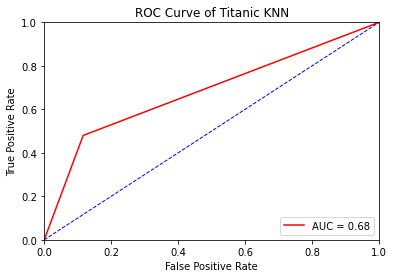

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

fpr, tpr, threshold = roc_curve(y_test, y_predict_titanic_knn)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],color = 'blue', lw=1, linestyle = '--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Titanic KNN')
plt.show()

In [17]:
#Using scikit-learn “Random Forest” classifier 
from sklearn.ensemble import RandomForestClassifier

titanic_RandomForest = RandomForestClassifier(n_estimators = 13, bootstrap = True, random_state=10)
titanic_RandomForest.fit(X_train, y_train)
y_predict_titanic_RandomForest = titanic_RandomForest.predict(X_test)

score_RandomForest = accuracy_score(y_test, y_predict_titanic_RandomForest)

print(score_RandomForest)

0.8375350140056023


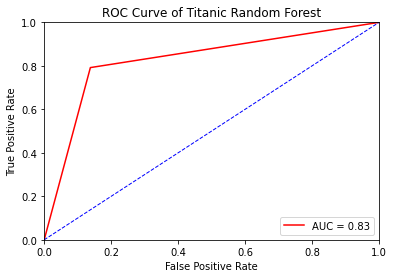

In [18]:
fpr, tpr, threshold = roc_curve(y_test, y_predict_titanic_RandomForest)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],color = 'blue', lw=1, linestyle = '--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Titanic Random Forest')
plt.show()

This is one of the 20 decision trees for random forest


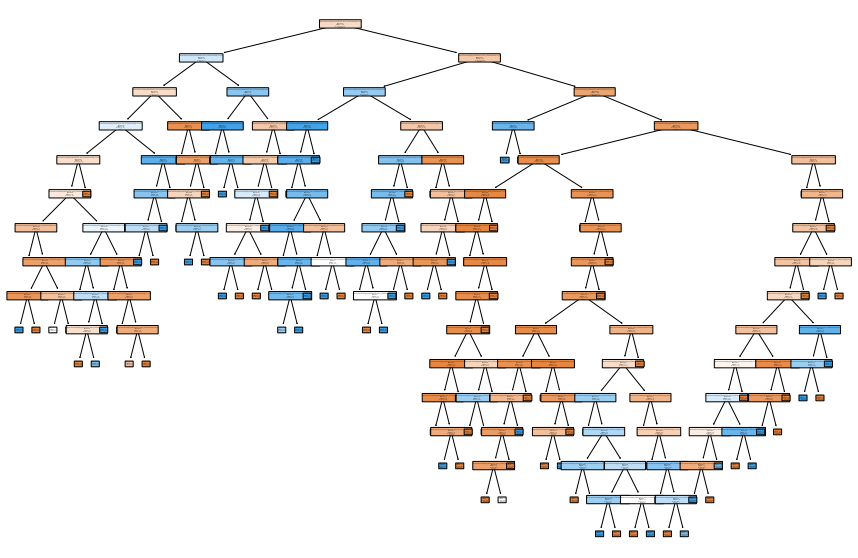

In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

print('This is one of the 20 decision trees for random forest')

fig = plt.figure(figsize=(15, 10))
plot_tree(titanic_RandomForest.estimators_[5], 
          feature_names= titanic_RandomForest, 
          class_names= ['0','1'], 
          filled=True, 
          impurity=True, 
          rounded=True)


fig.savefig('randomforest.pdf')